In [16]:
import numpy as np
import pandas as pd

data = []
with open('../data/soc-youtube.mtx', 'r') as f:
    for line in f:
        if line.startswith('%') or line.strip() == '':
            continue
        parts = line.strip().split()
        if len(parts) == 2:
            row, col = map(int, parts)
            data.append((row, col, 1))  
        elif len(parts) == 3:
            row, col, value = map(int, parts)
            data.append((row, col, value))

df = pd.DataFrame(data, columns=['row', 'col', 'value'])

print(df.head())
print(df.info())




      row     col    value
0  495957  495957  1936748
1       2       1        1
2       3       1        1
3       4       1        1
4       5       1        1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936749 entries, 0 to 1936748
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   row     int64
 1   col     int64
 2   value   int64
dtypes: int64(3)
memory usage: 44.3 MB
None


In [17]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.from_pandas_edgelist(df, 'row', 'col')

num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Graph has {num_nodes} nodes and {num_edges} edges.")


Graph has 495957 nodes and 1936749 edges.


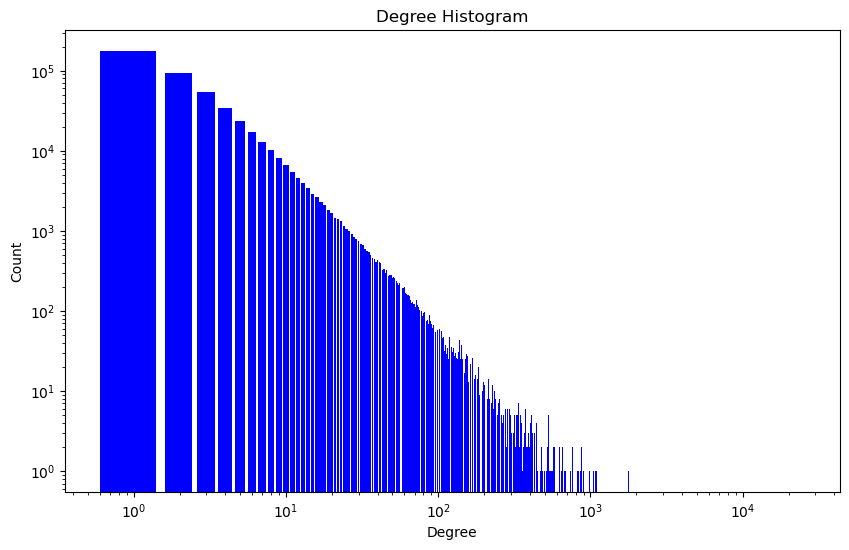

In [20]:
import numpy as np
import collections

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = collections.Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

plt.figure(figsize=(10, 6))
plt.bar(deg, cnt, width=0.80, color='b')
plt.yscale('log')
plt.xscale('log')
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()



In [22]:
import random

sample_size = 10000  
nodes_sample = random.sample(list(G.nodes()), sample_size)
subgraph = G.subgraph(nodes_sample)

num_nodes = subgraph.number_of_nodes()
num_edges = subgraph.number_of_edges()
print(f"Subgraph has {num_nodes} nodes and {num_edges} edges.")


degree_centrality = nx.degree_centrality(subgraph)

betweenness_centrality = nx.betweenness_centrality(subgraph, k=100, normalized=True, endpoints=False, seed=42)

closeness_centrality = nx.closeness_centrality(subgraph)

print("Top 5 nodes by degree centrality:")
print(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)[:5])

print("Top 5 nodes by betweenness centrality (approximation):")
print(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)[:5])

print("Top 5 nodes by closeness centrality:")
print(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)[:5])


Subgraph has 10000 nodes and 800 edges.
Top 5 nodes by degree centrality:
[(73874, 0.0033003300330033004), (712, 0.0021002100210021), (1953, 0.0015001500150015003), (2753, 0.0015001500150015003), (4173, 0.0015001500150015003)]
Top 5 nodes by betweenness centrality (approximation):
[(73874, 0.001148844630412231), (83641, 0.0007677303037365149), (32612, 0.0007637291034564549), (45412, 0.0007397219017760948), (39753, 0.0007037110992555547)]
Top 5 nodes by closeness centrality:
[(31751, 0.005247818528568569), (4171, 0.005121332646085121), (39753, 0.0050234399697515015), (93850, 0.004975883736854004), (17285, 0.004905009164963647)]
